# **Loading Packages**

In [39]:
import pandas as pd
import re
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import levene
import numpy as np
from matplotlib.patches import ConnectionPatch
import seaborn as sns
from scipy.stats import kruskal
from sklearn.preprocessing import OrdinalEncoder

# **Data Processing**

In [7]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
# Adjust the folder and file names as needed
folder_name = 'SLP Data'
file_name = 'Parent Satisfaction with SLP.csv'

# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

# Construct the file path
file_path = f'/content/gdrive/MyDrive/{folder_name}/{file_name}'

# Read the CSV file into a DataFrame
df_raw = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df_raw.head())

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
                                           StartDate  \
0                                         Start Date   
1  {"ImportId":"startDate","timeZone":"America/De...   
2                                2023-09-22 08:57:28   
3                                2023-10-04 05:41:23   
4                                2023-10-19 13:04:38   

                                             EndDate                 Status  \
0                                           End Date          Response Type   
1  {"ImportId":"endDate","timeZone":"America/Denv...  {"ImportId":"status"}   
2                                2023-09-22 08:59:20             IP Address   
3                                2023-10-04 05:41:29             IP Address   
4                                2023-10-19 13:04:46             IP Address   

                  IPAddress                 Progress    D

In [4]:
import pandas as pd

# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

# Adjust the folder and file names as needed
folder_name = 'SLP Data'
file_name = 'Parent Satisfaction with SLP.csv'

# Construct the file path
file_path = f'/content/gdrive/MyDrive/{folder_name}/{file_name}'

# Read the CSV file into a DataFrame
df_raw = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df_raw.head())

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
                                           StartDate  \
0                                         Start Date   
1  {"ImportId":"startDate","timeZone":"America/De...   
2                                2023-09-22 08:57:28   
3                                2023-10-04 05:41:23   
4                                2023-10-19 13:04:38   

                                             EndDate                 Status  \
0                                           End Date          Response Type   
1  {"ImportId":"endDate","timeZone":"America/Denv...  {"ImportId":"status"}   
2                                2023-09-22 08:59:20             IP Address   
3                                2023-10-04 05:41:29             IP Address   
4                                2023-10-19 13:04:46             IP Address   

                  IPAddress                 Progress    D

In [43]:
# Removing first row that contains the question and second row containing 'import id' & resetting column index
df_raw = df_raw.iloc[2:].reset_index(drop=True)

In [44]:
df_raw.shape[0]

14

#Cleaning Columns/Rows

In [45]:
## Removing the incomplete/unsubmitted responses and resetting the index
df = df_raw[df_raw['Finished'] == 'True']
df = df.reset_index(drop=True)
df.shape[0]

10

In [46]:
import pandas as pd

# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

# Adjust the folder and file names as needed
folder_name = 'SLP Data'
file_name = 'Parent Satisfaction with SLP.csv'

# Construct the file path
file_path = f'/content/gdrive/MyDrive/{folder_name}/{file_name}'

# Read the CSV file into a DataFrame
survey_data = pd.read_csv(file_path)

# Display the first few rows
survey_data.head()


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q5_1,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q13,Q14
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,Rate your overall level of satisfaction with y...,Rate your level of agreement with the followin...,Rate your level of agreement with the followin...,Rate your level of agreement with the followin...,Rate your level of agreement with the followin...,Rate your level of agreement with the followin...,Rate your level of agreement with the followin...,Rate your level of agreement with the followin...,Are there any other factors that you feel have...,Are there any other factors that you feel have...
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID11_1""}","{""ImportId"":""QID5_1""}","{""ImportId"":""QID5_2""}","{""ImportId"":""QID5_3""}","{""ImportId"":""QID5_4""}","{""ImportId"":""QID5_5""}","{""ImportId"":""QID5_6""}","{""ImportId"":""QID5_7""}","{""ImportId"":""QID26_TEXT""}","{""ImportId"":""QID27_TEXT""}"
2,2023-09-22 08:57:28,2023-09-22 08:59:20,IP Address,71.167.85.248,38,112,False,2023-09-29 08:59:29,R_2zDgveyYVZMqDg0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-10-04 05:41:23,2023-10-04 05:41:29,IP Address,24.47.33.117,8,6,False,2023-10-11 05:41:33,R_1IARJXPgmD4kX33,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-10-19 13:04:38,2023-10-19 13:04:46,IP Address,12.182.255.254,100,8,True,2023-10-19 13:04:48,R_wRJl4Yqyed8EJ6V,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
import pandas as pd

# Assuming survey_data is your DataFrame
pd.set_option('display.max_rows', None)

# Display the entire DataFrame
print(survey_data)

# Reset the display option to the default (if needed)
pd.reset_option('display.max_rows')


                                            StartDate  \
0                                          Start Date   
1   {"ImportId":"startDate","timeZone":"America/De...   
2                                 2023-09-22 08:57:28   
3                                 2023-10-04 05:41:23   
4                                 2023-10-19 13:04:38   
5                                 2023-10-19 18:16:03   
6                                 2023-10-20 20:54:51   
7                                 2023-10-19 12:36:14   
8                                 2023-11-05 10:27:54   
9                                 2023-11-09 10:51:43   
10                                2023-11-21 13:19:38   
11                                2023-11-21 13:39:03   
12                                2023-11-21 15:41:40   
13                                2023-11-21 15:45:17   
14                                2023-11-21 16:54:31   
15                                2023-11-15 16:08:44   

                              

In [48]:
# Display the current column names in your DataFrame
print(df.columns)


Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Consent', 'Q', 'Q.1', 'Q.2',
       'Q_2_TEXT', 'Q.3', 'Q_2_TEXT.1', 'Q1', 'Q1_6_TEXT', 'Q2', 'Q3', 'Q4',
       'Q4_2_TEXT', 'Q5_1', 'Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6',
       'Q6_7', 'Q13', 'Q14'],
      dtype='object')


In [49]:
# Display the updated columns
print(survey_data.columns)

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Consent', 'Q', 'Q.1', 'Q.2',
       'Q_2_TEXT', 'Q.3', 'Q_2_TEXT.1', 'Q1', 'Q1_6_TEXT', 'Q2', 'Q3', 'Q4',
       'Q4_2_TEXT', 'Q5_1', 'Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6',
       'Q6_7', 'Q13', 'Q14'],
      dtype='object')


In [50]:
import pandas as pd

# Assuming df is your DataFrame

# Display the current column names in your DataFrame
print(df.columns)

# Remove duplicate column names
df = df.loc[:, ~df.columns.duplicated()]

# List of columns to drop
columns_to_drop = ['StartDate', 'EndDate', 'Status', 'Progress', 'Duration (in seconds)', 'Finished', 'RecordedDate',
                   'ResponseId', 'DistributionChannel', 'UserLanguage', 'Q_RecaptchaScore']

# Remove duplicate column names from the list
columns_to_drop = list(set(columns_to_drop))

# Display the remaining columns in the DataFrame
print(df.columns)


Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Consent', 'Q', 'Q.1', 'Q.2',
       'Q_2_TEXT', 'Q.3', 'Q_2_TEXT.1', 'Q1', 'Q1_6_TEXT', 'Q2', 'Q3', 'Q4',
       'Q4_2_TEXT', 'Q5_1', 'Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6',
       'Q6_7', 'Q13', 'Q14'],
      dtype='object')
Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Consent', 'Q', 'Q.1', 'Q.2',
       'Q_2_TEXT', 'Q.3', 'Q_2_TEXT.1', 'Q1', 'Q1_6_TEXT', 'Q2', 'Q3', 'Q4',
       'Q4_2

In [51]:
import pandas as pd

# Assuming survey_data is DataFrame

# Display the current column names in your DataFrame
print(survey_data.columns)

# Remove duplicate column names
df = df.loc[:, ~survey_data.columns.duplicated()]

# List of columns to drop
columns_to_drop = ['StartDate', 'EndDate', 'Status', 'Progress', 'Duration (in seconds)', 'Finished', 'RecordedDate',
                   'ResponseId', 'DistributionChannel', 'UserLanguage', 'Q_RecaptchaScore']

# Remove duplicate column names from the list
columns_to_drop = list(set(columns_to_drop))

# Display the remaining columns in the DataFrame
print(survey_data.columns)

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Consent', 'Q', 'Q.1', 'Q.2',
       'Q_2_TEXT', 'Q.3', 'Q_2_TEXT.1', 'Q1', 'Q1_6_TEXT', 'Q2', 'Q3', 'Q4',
       'Q4_2_TEXT', 'Q5_1', 'Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6',
       'Q6_7', 'Q13', 'Q14'],
      dtype='object')
Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Consent', 'Q', 'Q.1', 'Q.2',
       'Q_2_TEXT', 'Q.3', 'Q_2_TEXT.1', 'Q1', 'Q1_6_TEXT', 'Q2', 'Q3', 'Q4',
       'Q4_2

In [52]:
df

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q5_1,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q13,Q14
0,2023-10-19 13:04:38,2023-10-19 13:04:46,IP Address,12.182.255.254,100,8,True,2023-10-19 13:04:48,R_wRJl4Yqyed8EJ6V,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-10-19 18:16:03,2023-10-19 18:16:29,IP Address,32.213.169.253,100,25,True,2023-10-19 18:16:30,R_2duzFvKBDPaNgbY,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-10-20 20:54:51,2023-10-20 21:00:28,IP Address,108.30.78.120,100,336,True,2023-10-20 21:00:29,R_1KxVC2ZBluK42f7,NaN,...,7,6,5,1,5,4,4,7,The connection with the therapist was great.,My child’s experience was positive. The sessio...
3,2023-11-05 10:27:54,2023-11-05 10:28:06,IP Address,72.13.154.202,100,12,True,2023-11-05 10:28:07,R_2am0Q1GJW1MNA8d,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-11-09 10:51:43,2023-11-09 10:52:08,IP Address,129.49.100.22,100,25,True,2023-11-09 10:52:09,R_10IzKABIcuqDdQm,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2023-11-21 13:19:38,2023-11-21 13:38:59,IP Address,69.112.48.113,100,1160,True,2023-11-21 13:38:59,R_Pu3SzLwcTL02YjD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2023-11-21 13:39:03,2023-11-21 13:41:46,IP Address,69.112.48.113,100,163,True,2023-11-21 13:41:47,R_3kCdgDlew1RWOTN,NaN,...,6,5,3,7,3,7,2,4,Our speech therapist was very flexible with ap...,Technological issues and lack of in-person edu...
7,2023-11-21 15:41:40,2023-11-21 15:43:55,IP Address,69.124.211.160,100,134,True,2023-11-21 15:43:56,R_33k8Nfl7tS2HhSM,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2023-11-21 15:45:17,2023-11-21 15:49:45,IP Address,69.124.211.160,100,268,True,2023-11-21 15:49:46,R_1Cvh21HA278a0o3,NaN,...,6,7,6,6,5,6,5,6,The convenience of no travel.,No
9,2023-11-21 16:54:31,2023-11-21 16:57:23,IP Address,107.77.226.12,100,171,True,2023-11-21 16:57:24,R_3j9A0gbgH9Zk6J6,NaN,...,5,5,5,5,4,3,5,4,NaN,NaN


In [53]:
# Display the current column names in the DataFrame
print(df.columns)


Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Consent', 'Q', 'Q.1', 'Q.2',
       'Q_2_TEXT', 'Q.3', 'Q_2_TEXT.1', 'Q1', 'Q1_6_TEXT', 'Q2', 'Q3', 'Q4',
       'Q4_2_TEXT', 'Q5_1', 'Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6',
       'Q6_7', 'Q13', 'Q14'],
      dtype='object')


In [54]:
# Display unique values in the 'Q' column
print("Unique values in 'Q':", df['Q'].unique())

# Replace values for race or ethnicity (Q column)
df['Q'] = df['Q'].map({'No': 0, 'Yes': 1})

# Display unique values in the 'Q.1' column
print("Unique values in 'Q.1':", df['Q.1'].unique())

# Replace values for child's diagnosis (Q.1 column)
df['Q.1'] = df['Q.1'].map({'NO': 0, 'YES': 1})

Unique values in 'Q': ['No' 'Yes']
Unique values in 'Q.1': [nan '14' 'Under 8' '10' '12' '13']


               Q  Q.1
count  10.000000  0.0
mean    0.700000  NaN
std     0.483046  NaN
min     0.000000  NaN
25%     0.250000  NaN
50%     1.000000  NaN
75%     1.000000  NaN
max     1.000000  NaN
Unique values in 'Q': [0 1]
Unique values in 'Q.1': [nan]
Unique values in 'Q.2': [nan 'If yes, list dates:']
Unique values in 'Q_2_TEXT': [nan 'Twice a week starting in November 2017' 'April 2018 - May 2019'
 '2018-2019' '2017-March 2020' 'January 2019 to March 2020']
Unique values in 'Q.3': [nan 'If yes, list dates:' 'No']
Unique values in 'Q_2_TEXT.1': [nan 'We tried once a week. It picked back up May 2020 (I think)'
 'March 2020 - May 2020' 'March 2020-June 2022'
 'March 2020 to December 2021']
Unique values in 'Q1': [nan 'White/Caucasian' 'Hispanic']
Unique values in 'Q1_6_TEXT': [nan]
Unique values in 'Q2': [nan 'Education' 'Neither']
Unique values in 'Q3': [nan 'Speech' 'Speech ']
Unique values in 'Q4': [nan 'No' 'If yes, please specify:']
Unique values in 'Q4_2_TEXT': [nan 'ADHD']
Un

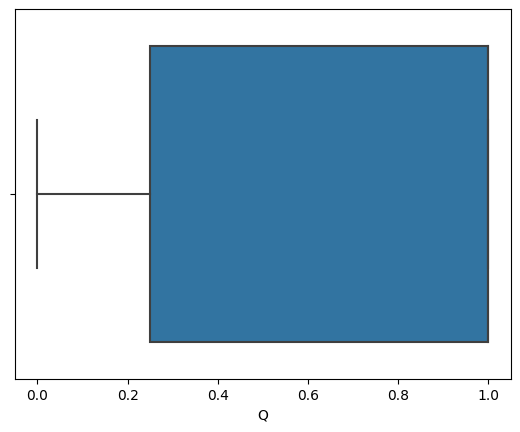

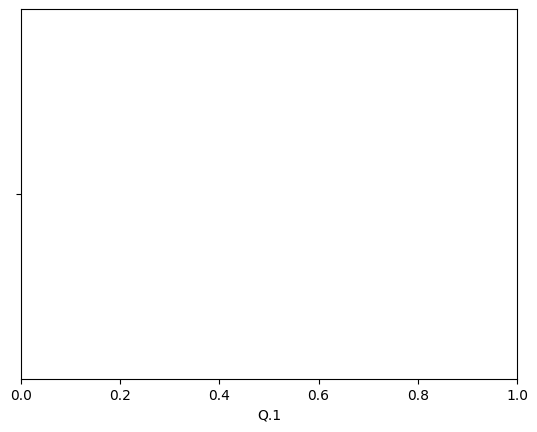

Skipping boxplot for 'Q.2' due to non-numeric values.
Skipping boxplot for 'Q_2_TEXT' due to non-numeric values.
Skipping boxplot for 'Q.3' due to non-numeric values.
Skipping boxplot for 'Q_2_TEXT.1' due to non-numeric values.
Skipping boxplot for 'Q1' due to non-numeric values.


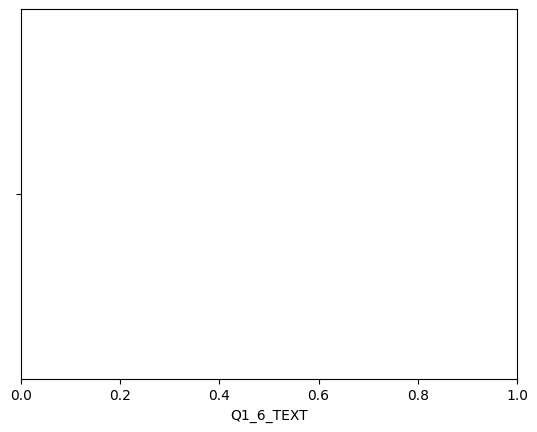

Skipping boxplot for 'Q2' due to non-numeric values.
Skipping boxplot for 'Q3' due to non-numeric values.
Skipping boxplot for 'Q4' due to non-numeric values.
Skipping boxplot for 'Q4_2_TEXT' due to non-numeric values.


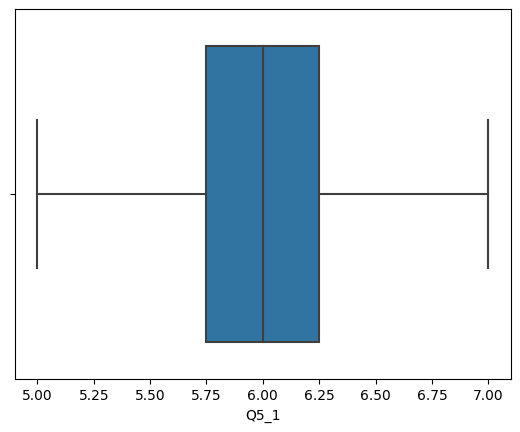

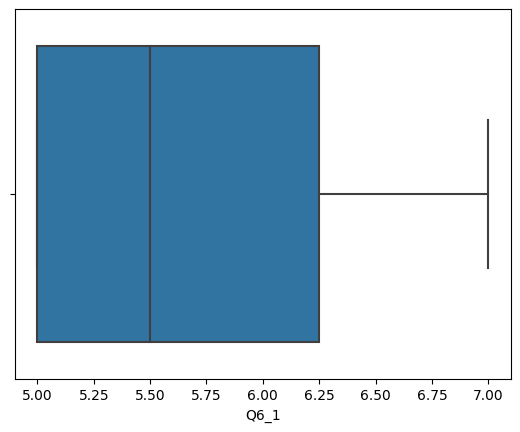

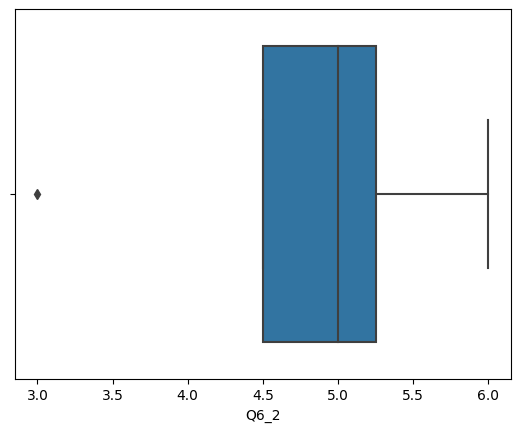

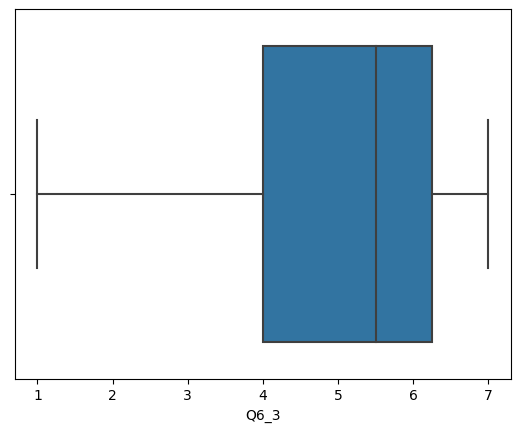

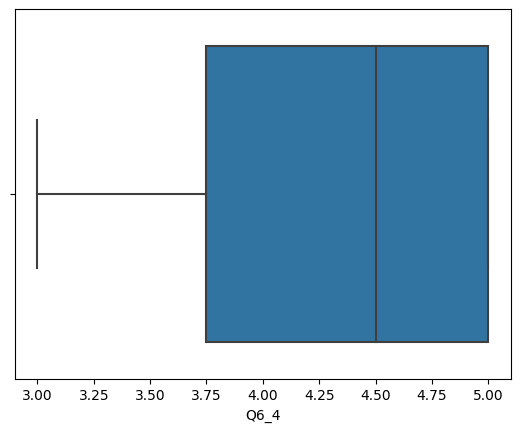

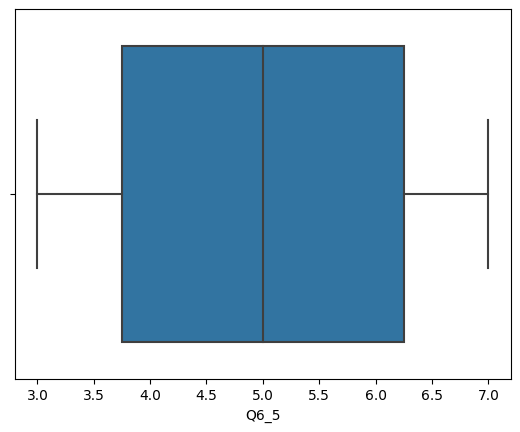

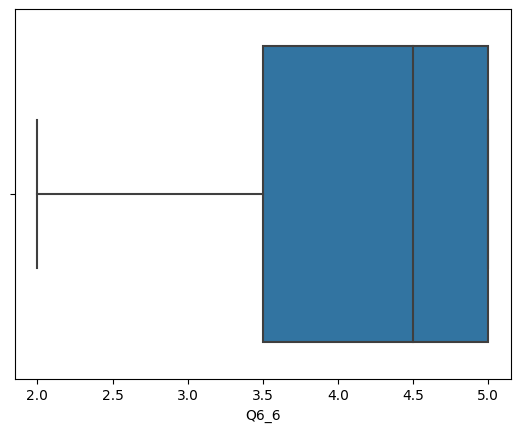

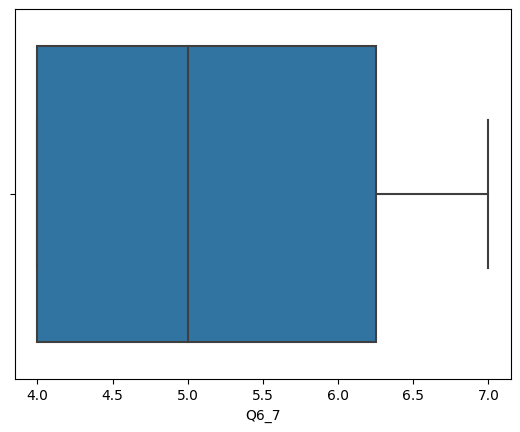

Skipping boxplot for 'Q13' due to non-numeric values.
Skipping boxplot for 'Q14' due to non-numeric values.


In [55]:
from scipy.stats import kruskal

# Select Likert scale columns
likert_columns = df.columns[df.columns.str.startswith('Q')]

# Descriptive statistics
likert_stats = df[likert_columns].describe()
print(likert_stats)

# Print unique values for each Likert scale column
for column in likert_columns:
    print(f"Unique values in '{column}': {df[column].unique()}")

# Visualize the distribution of Likert scale responses (excluding non-numeric values)
for column in likert_columns:
    try:
        sns.boxplot(x=df[column].astype(float), data=df)
        plt.show()
    except ValueError:
        print(f"Skipping boxplot for '{column}' due to non-numeric values.")


#Assigning Nummerical Values (Likert Scale questions- Question 5_1 through 6_7)

In [56]:
# Define a mapping for Likert scale questions
likert_mapping = {
    'Q5_1': 'Q5',
    'Q6_1': 'Q6',
    'Q6_2': 'Q7',
    'Q6_3': 'Q8',
    'Q6_4': 'Q9',
    'Q6_5': 'Q10',
    'Q6_6': 'Q11',
    'Q6_7': 'Q12',
}

# Rename columns in the survey_data DataFrame
survey_data.rename(columns=likert_mapping, inplace=True)

# Display the updated columns
print(survey_data.columns)

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Consent', 'Q', 'Q.1', 'Q.2',
       'Q_2_TEXT', 'Q.3', 'Q_2_TEXT.1', 'Q1', 'Q1_6_TEXT', 'Q2', 'Q3', 'Q4',
       'Q4_2_TEXT', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13',
       'Q14'],
      dtype='object')


In [57]:
# Display unique values in the 'Q5' column
print("Unique values in 'Q5':", survey_data['Q5'].unique())

Unique values in 'Q5': ["Rate your overall level of satisfaction with your child's SLP services prior to the pandemic on a scale of 1-7 with 7 being the highest level of satisfaction. - Overal Satisfaction"
 '{"ImportId":"QID11_1"}' nan '7' '6' '5']


In [58]:
import numpy as np

# Replace non-numeric entries with NaN
survey_data['Q5'] = pd.to_numeric(survey_data['Q5'], errors='coerce')

# Display unique values after conversion
print("Unique values in 'Q5':", survey_data['Q5'].unique())

Unique values in 'Q5': [nan  7.  6.  5.]


In [59]:
# Mapping categories to numerical values for 'Q5'
survey_data['Q5'] = survey_data['Q5'].replace({
    'Very Dissatisfied': 1,
    'Dissatisfied': 2,
    'Somewhat Dissatisfied': 3,
    'Neutral': 4,
    'Somewhat Satisfied': 5,
    'Satisfied': 6,
    'Very Satisfied': 7
}).astype(float)  # Make sure to use float for decimal values

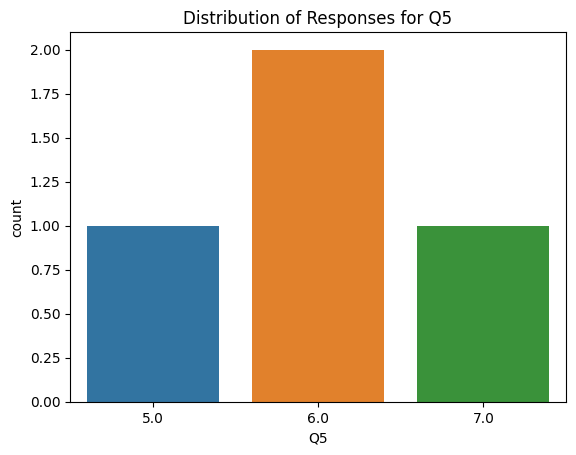

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of 'Q5'
sns.countplot(x='Q5', data=survey_data)
plt.title('Distribution of Responses for Q5')
plt.show()

In [61]:
import numpy as np

# Replace non-numeric entries with NaN
survey_data['Q6'] = pd.to_numeric(survey_data['Q6'], errors='coerce')

# Display unique values after conversion
print("Unique values in 'Q6':", survey_data['Q6'].unique())

Unique values in 'Q6': [nan  6.  5.  7.]


In [62]:
# Mapping categories to numerical values for 'Q6'
survey_data['Q6'] = survey_data['Q6'].replace({
    'Very Dissatisfied': 1,
    'Dissatisfied': 2,
    'Somewhat Dissatisfied': 3,
    'Neutral': 4,
    'Somewhat Satisfied': 5,
    'Satisfied': 6,
    'Very Satisfied': 7
}).astype(float)  # Make sure to use float if you have decimal values

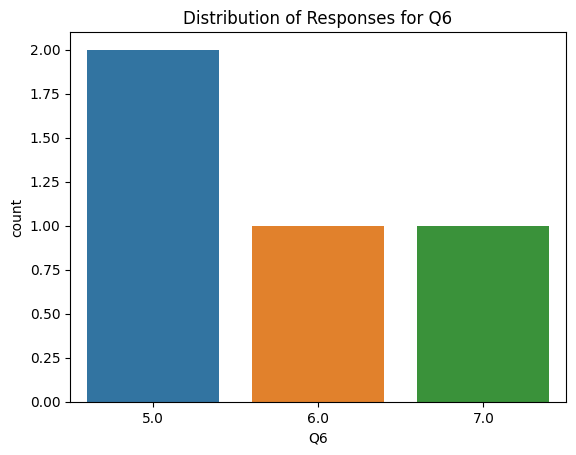

In [63]:
# Plot the distribution of 'Q6'
sns.countplot(x='Q6', data=survey_data)
plt.title('Distribution of Responses for Q6')
plt.show()

In [64]:
import numpy as np

# Replace non-numeric entries with NaN
survey_data['Q7'] = pd.to_numeric(survey_data['Q7'], errors='coerce')

# Display unique values after conversion
print("Unique values in 'Q7':", survey_data['Q7'].unique())

Unique values in 'Q7': [nan  5.  3.  6.]


In [65]:
# Mapping categories to numerical values for 'Q7'
survey_data['Q7'] = survey_data['Q7'].replace({
    'Very Dissatisfied': 1,
    'Dissatisfied': 2,
    'Somewhat Dissatisfied': 3,
    'Neutral': 4,
    'Somewhat Satisfied': 5,
    'Satisfied': 6,
    'Very Satisfied': 7
}).astype(float)  # Make sure to use float if you have decimal values

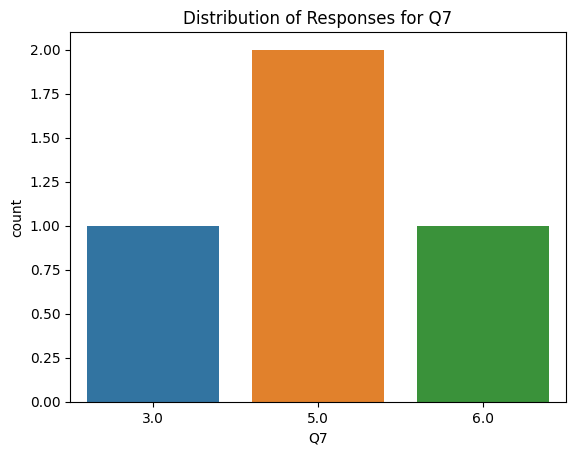

In [66]:
# Plot the distribution of 'Q7'
sns.countplot(x='Q7', data=survey_data)
plt.title('Distribution of Responses for Q7')
plt.show()

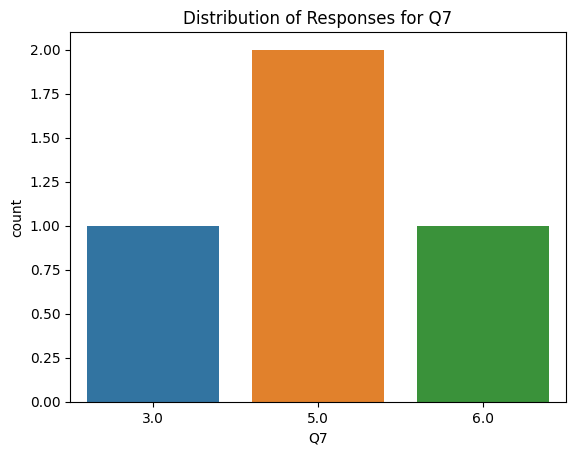

In [67]:
# Filter the DataFrame for values 3, 5, and 6
filtered_data = survey_data[survey_data['Q7'].isin([3, 5, 6])]

# Plot the distribution of 'Q7'
sns.countplot(x='Q7', data=filtered_data)
plt.title('Distribution of Responses for Q7')
plt.show()

In [68]:
import numpy as np

# Replace non-numeric entries with NaN
survey_data['Q8'] = pd.to_numeric(survey_data['Q8'], errors='coerce')

# Display unique values after conversion
print("Unique values in 'Q8':", survey_data['Q8'].unique())

Unique values in 'Q8': [nan  1.  7.  6.  5.]


In [69]:
# Mapping categories to numerical values for 'Q8'
survey_data['Q8'] = survey_data['Q8'].replace({
    'Very Dissatisfied': 1,
    'Dissatisfied': 2,
    'Somewhat Dissatisfied': 3,
    'Neutral': 4,
    'Somewhat Satisfied': 5,
    'Satisfied': 6,
    'Very Satisfied': 7
}).astype(float)  # Make sure to use float if you have decimal values

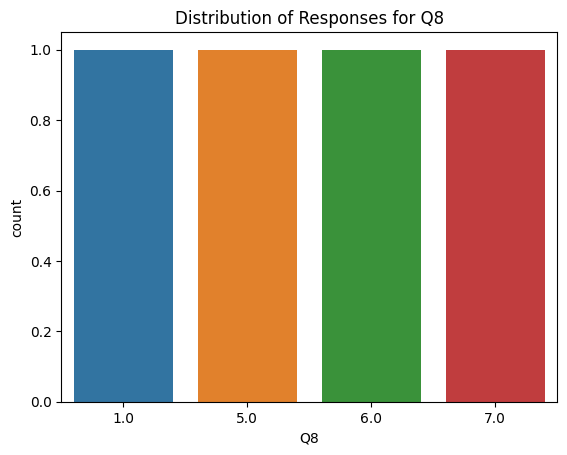

In [70]:
# Plot the distribution of 'Q8'
sns.countplot(x='Q8', data=survey_data)
plt.title('Distribution of Responses for Q8')
plt.show()

In [71]:
# Replace non-numeric entries with NaN
survey_data['Q9'] = pd.to_numeric(survey_data['Q9'], errors='coerce')

# Display unique values after conversion
print("Unique values in 'Q9':", survey_data['Q9'].unique())

Unique values in 'Q9': [nan  5.  3.  4.]


In [72]:
# Mapping categories to numerical values for 'Q9'
survey_data['Q9'] = survey_data['Q9'].replace({
    'Very Dissatisfied': 1,
    'Dissatisfied': 2,
    'Somewhat Dissatisfied': 3,
    'Neutral': 4,
    'Somewhat Satisfied': 5,
    'Satisfied': 6,
    'Very Satisfied': 7
}).astype(float)  # Make sure to use float if you have decimal values

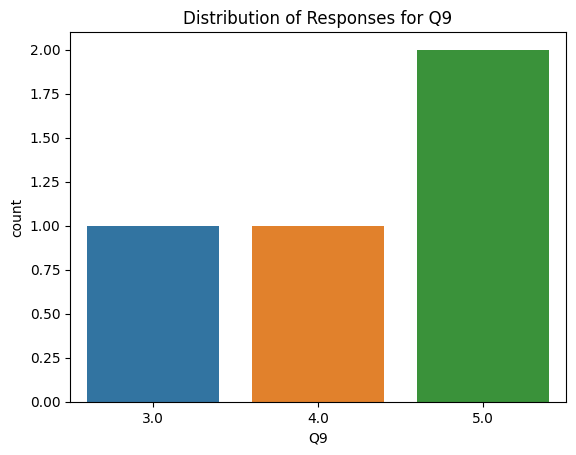

In [73]:
# Plot the distribution of 'Q9'
sns.countplot(x='Q9', data=survey_data)
plt.title('Distribution of Responses for Q9')
plt.show()

In [74]:
# Replace non-numeric entries with NaN
survey_data['Q10'] = pd.to_numeric(survey_data['Q10'], errors='coerce')

# Display unique values after conversion
print("Unique values in 'Q10':", survey_data['Q10'].unique())

Unique values in 'Q10': [nan  4.  7.  6.  3.]


In [75]:
# Mapping categories to numerical values for 'Q10'
survey_data['Q10'] = survey_data['Q10'].replace({
    'Very Dissatisfied': 1,
    'Dissatisfied': 2,
    'Somewhat Dissatisfied': 3,
    'Neutral': 4,
    'Somewhat Satisfied': 5,
    'Satisfied': 6,
    'Very Satisfied': 7
}).astype(float)  # Make sure to use float if you have decimal values

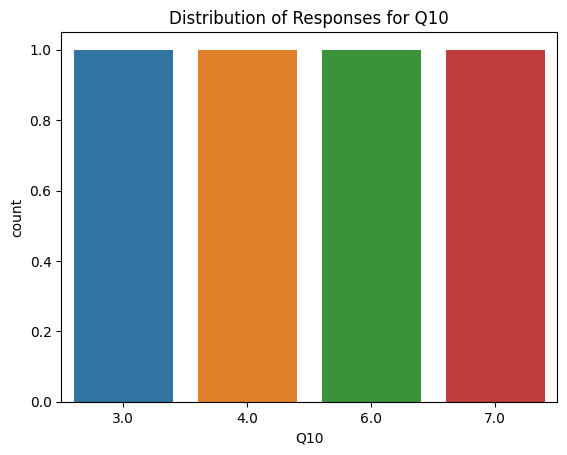

In [76]:
# Plot the distribution of 'Q10'
sns.countplot(x='Q10', data=survey_data)
plt.title('Distribution of Responses for Q10')
plt.show()

In [77]:
# Replace non-numeric entries with NaN
survey_data['Q11'] = pd.to_numeric(survey_data['Q11'], errors='coerce')

# Display unique values after conversion
print("Unique values in 'Q11':", survey_data['Q11'].unique())

Unique values in 'Q11': [nan  4.  2.  5.]


In [78]:
# Mapping categories to numerical values for 'Q11'
survey_data['Q11'] = survey_data['Q11'].replace({
    'Very Dissatisfied': 1,
    'Dissatisfied': 2,
    'Somewhat Dissatisfied': 3,
    'Neutral': 4,
    'Somewhat Satisfied': 5,
    'Satisfied': 6,
    'Very Satisfied': 7
}).astype(float)  # Make sure to use float if you have decimal values

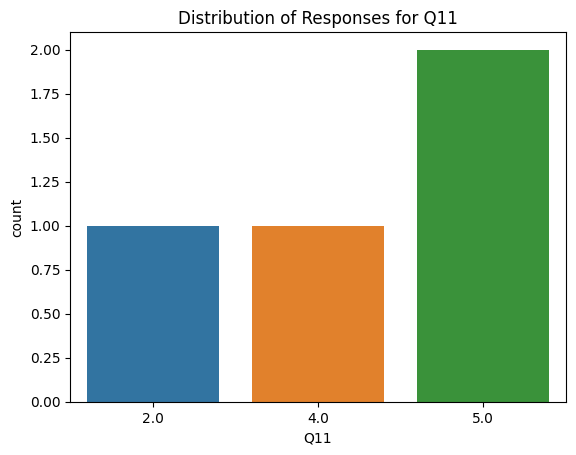

In [79]:
# Plot the distribution of 'Q11'
sns.countplot(x='Q11', data=survey_data)
plt.title('Distribution of Responses for Q11')
plt.show()

In [80]:
# Replace non-numeric entries with NaN
survey_data['Q12'] = pd.to_numeric(survey_data['Q12'], errors='coerce')

# Display unique values after conversion
print("Unique values in 'Q12':", survey_data['Q12'].unique())

Unique values in 'Q12': [nan  7.  4.  6.]


In [81]:
# Mapping categories to numerical values for 'Q12'
survey_data['Q12'] = survey_data['Q12'].replace({
    'Very Dissatisfied': 1,
    'Dissatisfied': 2,
    'Somewhat Dissatisfied': 3,
    'Neutral': 4,
    'Somewhat Satisfied': 5,
    'Satisfied': 6,
    'Very Satisfied': 7
}).astype(float)  # Make sure to use float if you have decimal values

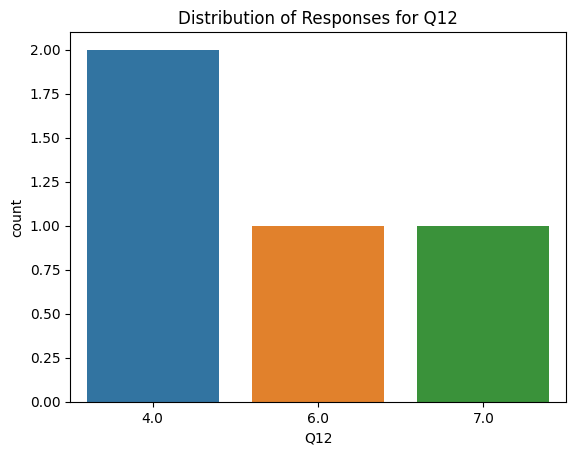

In [82]:
# Plot the distribution of 'Q12'
sns.countplot(x='Q12', data=survey_data)
plt.title('Distribution of Responses for Q12')
plt.show()

#Renaming The Columns (can delete later)

In [83]:
import re

# Find the common prefix
common_prefix = re.match(r'([A-Za-z]+)', survey_data.columns[0]).group()

# Create a mapping for the columns you want to rename
column_mapping = {f'{common_prefix}5_1': f'{common_prefix}5',
                  f'{common_prefix}6_1': f'{common_prefix}6',
                  f'{common_prefix}6_2': f'{common_prefix}7',
                  f'{common_prefix}6_3': f'{common_prefix}8',
                  f'{common_prefix}6_4': f'{common_prefix}9',
                  f'{common_prefix}6_5': f'{common_prefix}10',
                  f'{common_prefix}6_6': f'{common_prefix}11',
                  f'{common_prefix}6_7': f'{common_prefix}12'}

# Rename the columns
survey_data.rename(columns=column_mapping, inplace=True)

In [84]:
# Define a mapping for Likert scale questions
likert_mapping = {
    'Q5_1': 'Q5',
    'Q6_1': 'Q6',
    'Q6_2': 'Q7',
    'Q6_3': 'Q8',
    'Q6_4': 'Q9',
    'Q6_5': 'Q10',
    'Q6_6': 'Q11',
    'Q6_7': 'Q12',
}

# Rename columns in the survey_data DataFrame
survey_data.rename(columns=likert_mapping, inplace=True)

# Display the updated columns
print(survey_data.columns)

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Consent', 'Q', 'Q.1', 'Q.2',
       'Q_2_TEXT', 'Q.3', 'Q_2_TEXT.1', 'Q1', 'Q1_6_TEXT', 'Q2', 'Q3', 'Q4',
       'Q4_2_TEXT', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13',
       'Q14'],
      dtype='object')


#Correlation Analysis

In [85]:
import pandas as pd

# Extract the relevant columns for correlation analysis
correlation_columns = ['Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12']

# Create a new DataFrame with the selected columns
correlation_data = survey_data[correlation_columns]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Display the correlation matrix
print(correlation_matrix)

               Q5        Q6            Q7        Q8        Q9       Q10  \
Q5   1.000000e+00  0.426401  7.204078e-17 -0.620920  0.426401  0.223607   
Q6   4.264014e-01  1.000000  7.608859e-01 -0.165476  0.818182  0.190693   
Q7   7.204078e-17  0.760886  1.000000e+00 -0.327361  0.899229 -0.435286   
Q8  -6.209204e-01 -0.165476 -3.273614e-01  1.000000 -0.628808  0.624789   
Q9   4.264014e-01  0.818182  8.992288e-01 -0.628808  1.000000 -0.381385   
Q10  2.236068e-01  0.190693 -4.352858e-01  0.624789 -0.381385  1.000000   
Q11 -2.886751e-01  0.492366  9.365858e-01 -0.268866  0.738549 -0.645497   
Q12  8.164966e-01  0.754337  5.739640e-01 -0.739345  0.870388 -0.121716   

          Q11       Q12  
Q5  -0.288675  0.816497  
Q6   0.492366  0.754337  
Q7   0.936586  0.573964  
Q8  -0.268866 -0.739345  
Q9   0.738549  0.870388  
Q10 -0.645497 -0.121716  
Q11  1.000000  0.314270  
Q12  0.314270  1.000000  


**Q5 (Overall satisfaction) with other questions:**

* Q5 has a strong positive correlation with Q12 (0.816) and moderate positive correlations with Q6 (0.426) and Q9 (0.426).
* Q5 has a strong negative correlation with Q8 (-0.621).

**Q6 (Accessibility via teletherapy) with other questions:**
* Q6 has a strong positive correlation with Q9 (0.818) and a moderate positive correlation with Q7 (0.761).

**Q7 (Adequate training for teletherapy software) with other questions:**
* Q7 has a strong positive correlation with Q9 (0.899) and a moderate positive correlation with Q11 (0.937).

**Q8 (Equivalently priced services) with other questions:**
* Q8 has a strong negative correlation with Q5 (-0.621) and a moderate negative correlation with Q9 (-0.629).

**Q9 (Equivalent services via teletherapy) with other questions:**
* Q9 has a strong positive correlation with Q6 (0.818), Q7 (0.899), and Q11 (0.739).

**Q10 (Frequency of teletherapy services) with other questions:**
* Q10 has a moderate negative correlation with Q7 (-0.435).

**Q11 (Benefit from teletherapy) with other questions:**
* Q11 has a strong positive correlation with Q7 (0.937) and a moderate positive correlation with Q9 (0.739).

**Q12 (Parent involvement via teletherapy) with other questions:**
* Q12 has a strong positive correlation with Q5 (0.816) and a moderate positive correlation with Q6 (0.754).


In [86]:
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Replace 'Q2' with the actual column name you want to investigate
categorical_variable = 'Q2'

# Create a formula for the ANOVA model
formula = f'Q5 ~ C({categorical_variable})'

# Fit the ANOVA model
model = ols(formula, data=survey_data).fit()

# Perform ANOVA
anova_results = anova_lm(model, typ=2)

# Display the ANOVA results
print(anova_results)

          sum_sq   df      F    PR(>F)
C(Q2)      217.5  3.0  145.0  0.006849
Residual     1.0  2.0    NaN       NaN


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


In [87]:
# Define a mapping for Likert scale questions
likert_mapping = {
    'Q5_1': 'Q5',
    'Q6_1': 'Q6',
    'Q6_2': 'Q7',
    'Q6_3': 'Q8',
    'Q6_4': 'Q9',
    'Q6_5': 'Q10',
    'Q6_6': 'Q11',
    'Q6_7': 'Q12',
}

# Rename columns in the survey_data DataFrame
survey_data.rename(columns=likert_mapping, inplace=True)

# Display the updated columns
print(survey_data.columns)

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Consent', 'Q', 'Q.1', 'Q.2',
       'Q_2_TEXT', 'Q.3', 'Q_2_TEXT.1', 'Q1', 'Q1_6_TEXT', 'Q2', 'Q3', 'Q4',
       'Q4_2_TEXT', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13',
       'Q14'],
      dtype='object')


#Anova

In [88]:
survey_data['Satisfaction'] = survey_data[['Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12']].mean(axis=1)

In [89]:
print(survey_data.columns)

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Consent', 'Q', 'Q.1', 'Q.2',
       'Q_2_TEXT', 'Q.3', 'Q_2_TEXT.1', 'Q1', 'Q1_6_TEXT', 'Q2', 'Q3', 'Q4',
       'Q4_2_TEXT', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13',
       'Q14', 'Satisfaction'],
      dtype='object')


In [90]:
survey_data['Accessibility_Training'] = survey_data[['Q6', 'Q7', 'Q8', 'Q11', 'Q12']].mean(axis=1)


In [91]:
print(survey_data.columns)

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Consent', 'Q', 'Q.1', 'Q.2',
       'Q_2_TEXT', 'Q.3', 'Q_2_TEXT.1', 'Q1', 'Q1_6_TEXT', 'Q2', 'Q3', 'Q4',
       'Q4_2_TEXT', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13',
       'Q14', 'Satisfaction', 'Accessibility_Training'],
      dtype='object')


In [92]:
# Display the updated DataFrame
print(survey_data[['Satisfaction', 'Accessibility_Training']])

    Satisfaction  Accessibility_Training
0            NaN                     NaN
1            NaN                     NaN
2            NaN                     NaN
3            NaN                     NaN
4            NaN                     NaN
5            NaN                     NaN
6          4.875                     4.6
7            NaN                     NaN
8            NaN                     NaN
9            NaN                     NaN
10           NaN                     NaN
11         4.625                     4.2
12           NaN                     NaN
13         5.875                     6.0
14         4.500                     4.8
15           NaN                     NaN


In [93]:
# Drop rows with NaN values in 'Satisfaction' and 'Accessibility_Training'
survey_data_cleaned = survey_data.dropna(subset=['Satisfaction', 'Accessibility_Training'])

# Display the cleaned DataFrame
print(survey_data_cleaned[['Satisfaction', 'Accessibility_Training']])

    Satisfaction  Accessibility_Training
6          4.875                     4.6
11         4.625                     4.2
13         5.875                     6.0
14         4.500                     4.8


In [94]:
# Assuming 'Q2' contains information about working in Education, Technology, or Neither
survey_data['Industry_Group'] = survey_data['Q2'].map({
    'Education': 'Education',
    'Technology': 'Technology',
    'Neither': 'Neither'
})

# Display the updated DataFrame
print(survey_data[['Satisfaction', 'Accessibility_Training', 'Industry_Group']])

    Satisfaction  Accessibility_Training Industry_Group
0            NaN                     NaN            NaN
1            NaN                     NaN            NaN
2            NaN                     NaN            NaN
3            NaN                     NaN            NaN
4            NaN                     NaN            NaN
5            NaN                     NaN            NaN
6          4.875                     4.6      Education
7            NaN                     NaN            NaN
8            NaN                     NaN            NaN
9            NaN                     NaN            NaN
10           NaN                     NaN            NaN
11         4.625                     4.2        Neither
12           NaN                     NaN            NaN
13         5.875                     6.0      Education
14         4.500                     4.8        Neither
15           NaN                     NaN            NaN


In [95]:
print(survey_data_cleaned.columns)


Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Consent', 'Q', 'Q.1', 'Q.2',
       'Q_2_TEXT', 'Q.3', 'Q_2_TEXT.1', 'Q1', 'Q1_6_TEXT', 'Q2', 'Q3', 'Q4',
       'Q4_2_TEXT', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13',
       'Q14', 'Satisfaction', 'Accessibility_Training'],
      dtype='object')


In [96]:
# 'Industry_Group' is the column indicating different industry groups
survey_data_cleaned['Industry_Group'] = survey_data_cleaned['Q2']

# Display the updated DataFrame
print(survey_data_cleaned[['Q2', 'Industry_Group']])


           Q2 Industry_Group
6   Education      Education
11    Neither        Neither
13  Education      Education
14    Neither        Neither


<ipython-input-96-8a8010081d3f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_data_cleaned['Industry_Group'] = survey_data_cleaned['Q2']


In [97]:
from scipy.stats import f_oneway

# 'Industry_Group' is the column indicating different industry groups
grouped_data = [group['Satisfaction'].dropna() for name, group in survey_data_cleaned.groupby('Industry_Group')]

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*grouped_data)

# Display the results
print(f'F-statistic: {f_stat}')
print(f'P-value: {p_value}')


F-statistic: 2.6
P-value: 0.24819058844388778


The p-value is greater than 0.05, suggesting that we do not have enough evidence to reject the null hypothesis. The null hypothesis typically states that there are no significant differences between the groups. Therefore, based on this analysis, we don't have sufficient evidence to conclude that there are significant differences in satisfaction between different industry groups.

#Satisfaction And Accessibility

In [98]:
# 'survey_data' is the DataFrame
survey_data['Satisfaction'] = survey_data[['Q5', 'Q9', 'Q10', 'Q11', 'Q12']].mean(axis=1)
survey_data['Accessibility'] = survey_data[['Q6', 'Q7', 'Q8']].mean(axis=1)


In [99]:
print(survey_data[['Satisfaction', 'Accessibility']])


    Satisfaction  Accessibility
0            NaN            NaN
1            NaN            NaN
2            NaN            NaN
3            NaN            NaN
4            NaN            NaN
5            NaN            NaN
6            5.4       4.000000
7            NaN            NaN
8            NaN            NaN
9            NaN            NaN
10           NaN            NaN
11           4.4       5.000000
12           NaN            NaN
13           5.6       6.333333
14           4.2       5.000000
15           NaN            NaN


In [100]:
# Drop rows with NaN values in the 'Satisfaction' column
satisfaction_data = survey_data.dropna(subset=['Satisfaction'])
# Perform one-way ANOVA for satisfaction
f_stat_satisfaction, p_value_satisfaction = f_oneway(satisfaction_data['Satisfaction'], [0]*len(satisfaction_data))
print(f"Satisfaction - F-statistic: {f_stat_satisfaction}, P-value: {p_value_satisfaction}")



Satisfaction - F-statistic: 194.67567567567707, P-value: 8.44792498007197e-06


A high F-statistic of 194.68 with a very low p-value of 8.45e-06 means that there is a significant difference in parent satisfaction levels between the time periods (pre vs post covid).

In [101]:
from scipy.stats import f_oneway

# Extract data for accessibility
accessibility_data = survey_data_cleaned.dropna(subset=['Accessibility_Training'])

# Perform one-way ANOVA for accessibility
f_stat_accessibility, p_value_accessibility = f_oneway(
    accessibility_data['Accessibility_Training'],
    [0]*len(accessibility_data)
)

# Print the results
print(f"Accessibility - F-statistic: {f_stat_accessibility}, P-value: {p_value_accessibility}")


Accessibility - F-statistic: 160.06666666666626, P-value: 1.4942735157822876e-05


The ANOVA analysis on accessibility-related questions yielded a substantial F-statistic of 160.07 and a very low p-value of 1.49e-05. This suggests a significant difference in parent perceptions of accessibility during teletherapy across different conditions